In [1]:
# Gerando um número aleatório que corresponde a quantidade de qubit no circuito
import random as rd
import random as rd
medicoes = [] 
n = rd.randint(4,10)

for i in range(n):
    j = round(rd.uniform(2,5),2)
    medicoes.append(j)

print("Medições:",n)
print("Períodos =",medicoes)

Medições: 5
Períodos = [3.31, 4.45, 2.27, 3.28, 2.37]


Circuito para 3.31


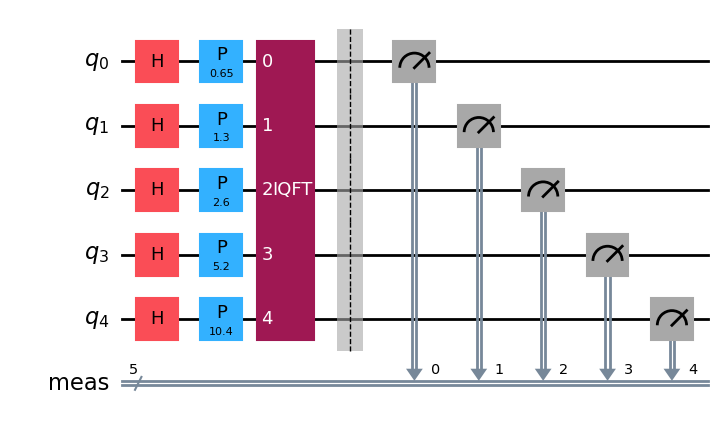

Circuito para 4.45


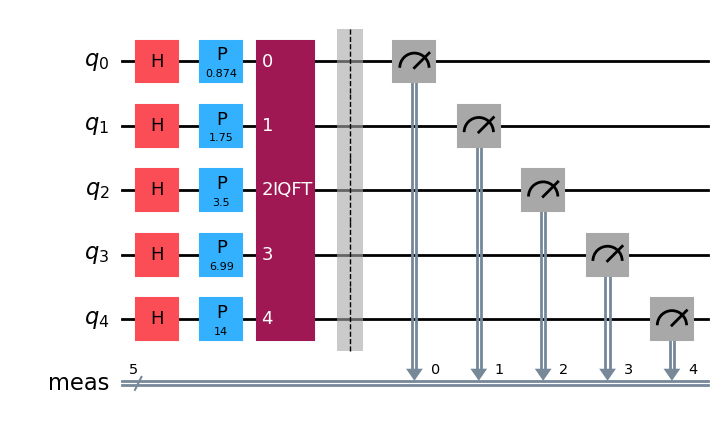

Circuito para 2.27


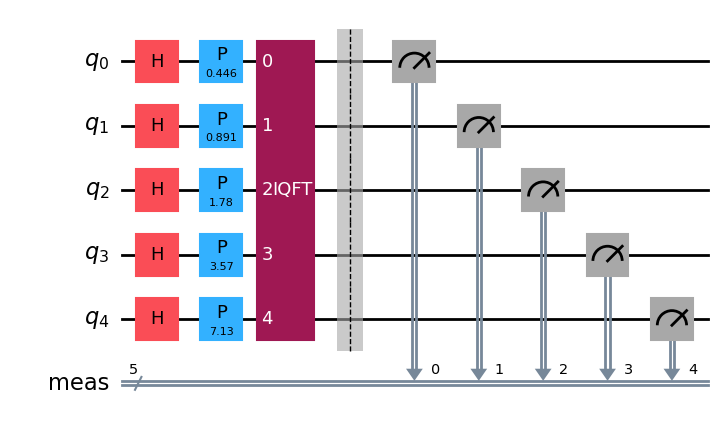

Circuito para 3.28


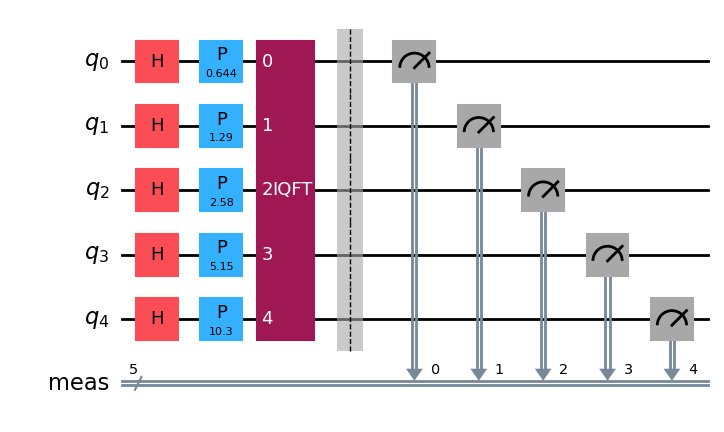

Circuito para 2.37


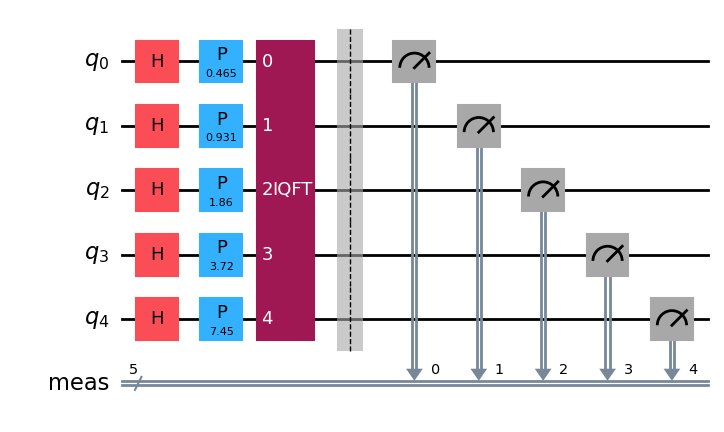

Períodos calculados = [3, 4, 2, 3, 2]
Média antes do Circuito: 3.136
Média depois do Circuito 2.8


In [7]:
# Implementando o IQFT
from qiskit import QuantumCircuit
import numpy as np
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit.primitives import StatevectorSampler

def medicao_sem_erro(num_qubits, medicao):
    periodos = []
    for i, periodo in enumerate(medicao):       
        qc = QuantumCircuit(num_qubits)
        for i in range (num_qubits):
            qc.h(i)
            theta = 2 * np.pi * periodo * (2 ** i) / (2 ** num_qubits)
            qc.p(theta, i)
        qc.append(QFT(num_qubits, inverse=True), qc.qubits)
        qc.measure_all()
        print("Circuito para",periodo)
        display(qc.draw('mpl'))

        sampler = StatevectorSampler()
        pub = (qc)
        job_sampler = sampler.run([pub], shots=1)

        result_sampler = job_sampler.result()
        counts_sampler = result_sampler[0].data.meas.get_counts()


        for bitstring, count in counts_sampler.items():
            value = int(bitstring, 2)
            periodos.append(value)
    return periodos

periodos_resultados = medicao_sem_erro(n, medicoes)
print("Períodos calculados =", periodos_resultados)

# Comparação das Médias:

media_periodos = np.mean(medicoes)
media_periodos_iqft = np.mean(periodos_resultados)
print("Média antes do Circuito:",media_periodos)
print("Média depois do Circuito",media_periodos_iqft)

In [8]:
# Introdução de erro

medicoes_com_erro = []
for m in medicoes:
    erro_percentual = rd.uniform(-0.1, 0.1) 
    valor_com_erro = round(m * (1 + erro_percentual), 2)
    medicoes_com_erro.append(valor_com_erro)

print("Períodos com Erro :", medicoes_com_erro)

Períodos com Erro : [3.3, 4.15, 2.33, 3.45, 2.22]


Circuito para 2.32


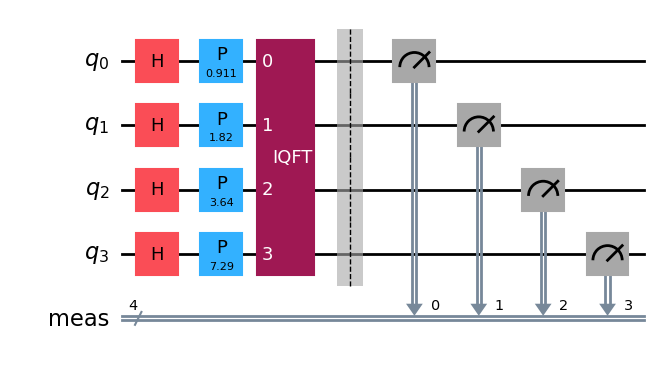

Circuito para 3.51


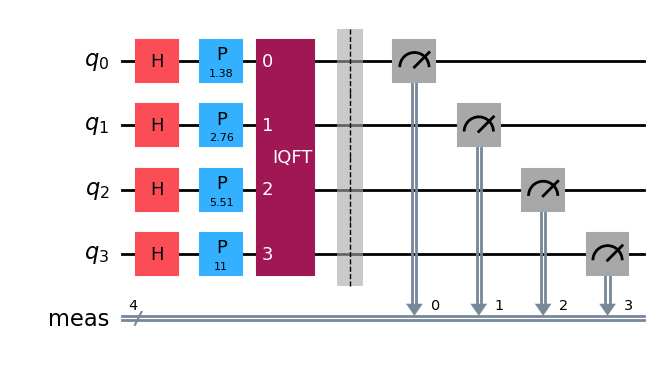

Circuito para 2.4


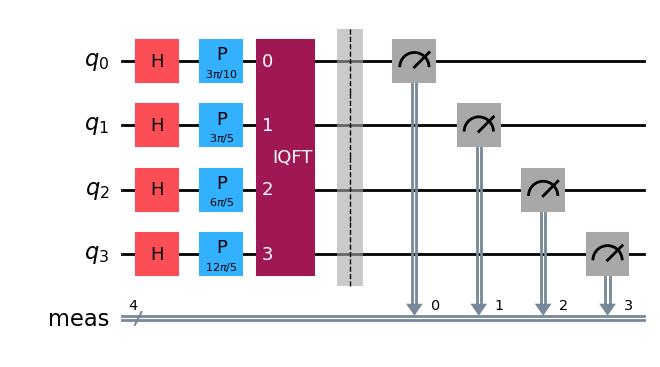

Circuito para 3.72


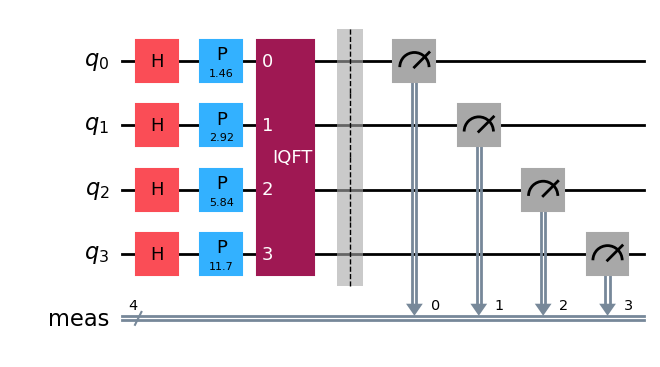

Períodos calculados = [2, 4, 3, 4]
Média antes do Circuito: 2.9875000000000003
Média após o Circuito 3.25


In [18]:
# Com o IQFT

def medicao_com_erro(num_qubits,medicoes_lista):
    periodos = []
    for i, periodo in enumerate(medicoes_lista):
        qc = QuantumCircuit(num_qubits)
        for i in range (num_qubits):
            qc.h(i)
            theta = 2 * np.pi * periodo * (2 ** i) / (2 ** num_qubits)
            qc.p(theta, i)

        qc.append(QFT(num_qubits, inverse=True), qc.qubits)
        qc.measure_all()
        print("Circuito para",periodo)
        display(qc.draw('mpl'))
        sampler = StatevectorSampler()
        pub = (qc)
        job_sampler = sampler.run([pub], shots=1)
        result_sampler = job_sampler.result()
        counts_sampler = result_sampler[0].data.meas.get_counts()

        for bitstring, count in counts_sampler.items():
            value = int(bitstring, 2)
            periodos.append(value)


    return periodos

periodos_resultados = medicao_com_erro(n, medicoes_com_erro)
print("Períodos calculados =", periodos_resultados)

# Comparação das Médias

media_periodos = np.mean(medicoes_com_erro)
media_periodos_iqft = np.mean(periodos_resultados)
print("Média antes do Circuito:",media_periodos)
print("Média após o Circuito",media_periodos_iqft)

In [11]:
# Automatização do processo para receber medições correspondentes à precisão mínima do circuito para representar os bits do período escolhido

import math

medicoes = [] 
n = rd.randint(4,10)

for i in range(n):
    j = round(rd.uniform(2,5),2)
    medicoes.append(j)

def quantidade_bits(n):
    if n < 1:
        return 0
    return math.floor(math.log2(n)) + 1

num_qubits=quantidade_bits(n)
print("Número de Medições:",n)
print("Quantidade de bits necessários:",num_qubits)


Número de Medições: 4
Quantidade de bits necessários: 3


In [12]:
medicoes_com_erro = []
for m in medicoes:
    erro_percentual = rd.uniform(-0.1, 0.1) 
    valor_com_erro = round(m * (1 + erro_percentual), 2)
    medicoes_com_erro.append(valor_com_erro)

print("Períodos com Erro :", medicoes_com_erro)

Períodos com Erro : [2.32, 3.51, 2.4, 3.72]


Circuito para 2.32


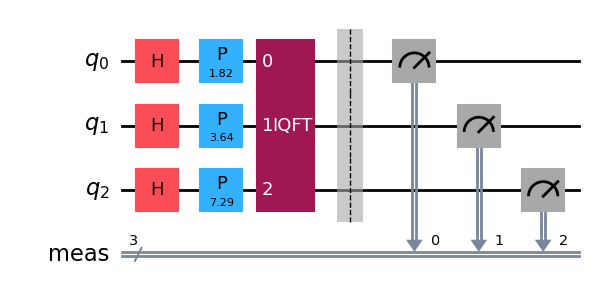

Circuito para 3.51


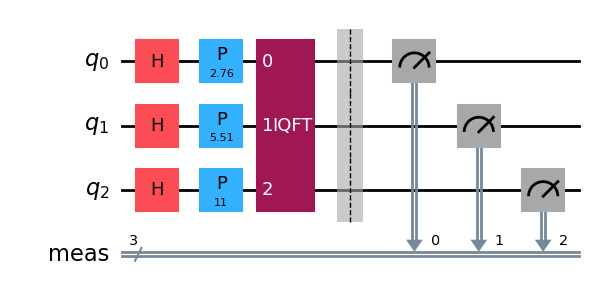

Circuito para 2.4


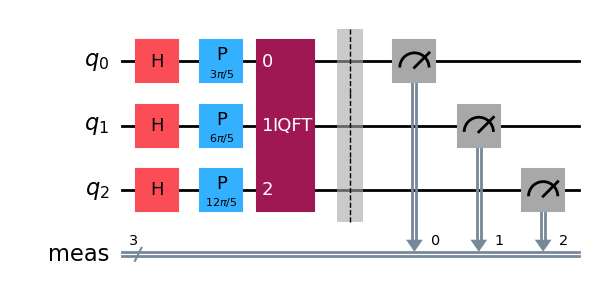

Circuito para 3.72


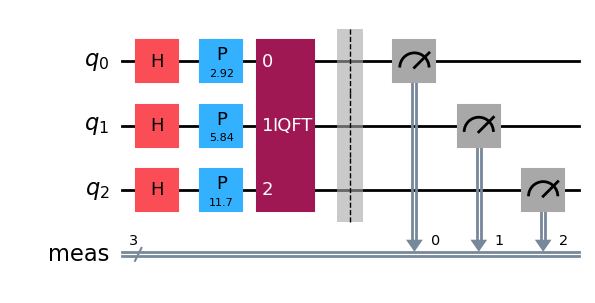

Períodos calculados :  [2, 3, 2, 4]
Média antes do Circuito: 2.9875000000000003
Média depois do Circuito 2.75


In [14]:
# Realizar o cálculo da média das medições e a obtenção do período por meio da IQFT

def periodo_e_media(num_qubits,medicoes_lista):
    
    periodos = []
    for i, periodo in enumerate(medicoes_lista):
        qc = QuantumCircuit(num_qubits)
        for i in range (num_qubits):
            qc.h(i)
            theta = 2 * np.pi * periodo * (2 ** i) / (2 ** num_qubits)
            qc.p(theta, i)

        qc.append(QFT(num_qubits, inverse=True), qc.qubits)
        qc.measure_all()
        print("Circuito para",periodo)
        display(qc.draw('mpl'))
        sampler = StatevectorSampler()
        pub = (qc)
        job_sampler = sampler.run([pub], shots=1)
        result_sampler = job_sampler.result()
        counts_sampler = result_sampler[0].data.meas.get_counts()
        for bitstring, count in counts_sampler.items():
            value = int(bitstring, 2)
            periodos.append(value)
        
        

    return periodos

periodos_resultados = periodo_e_media(num_qubits, medicoes_com_erro)
print("Períodos calculados : ", periodos_resultados)


# Comparação das Médias

media_periodos = np.mean(medicoes_com_erro)
media_periodos_iqft = np.mean(periodos_resultados)
print("Média antes do Circuito:",media_periodos)
print("Média depois do Circuito",media_periodos_iqft)

Circuito para 2.32


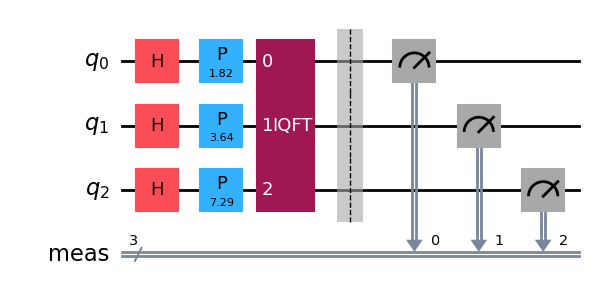

Circuito para 3.51


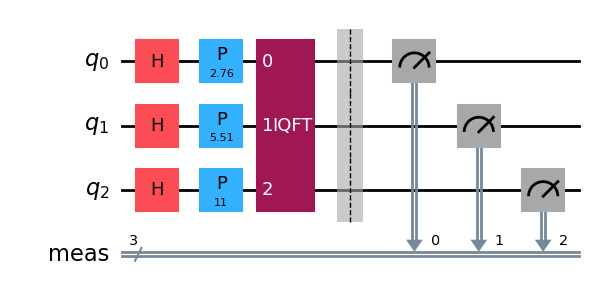

Circuito para 2.4


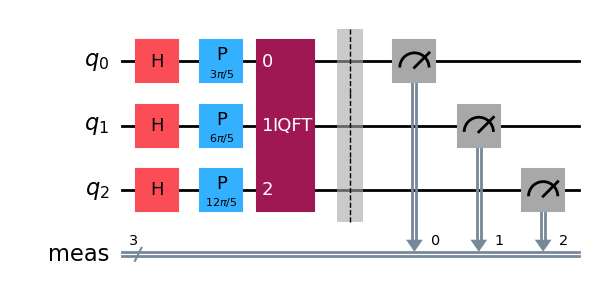

Circuito para 3.72


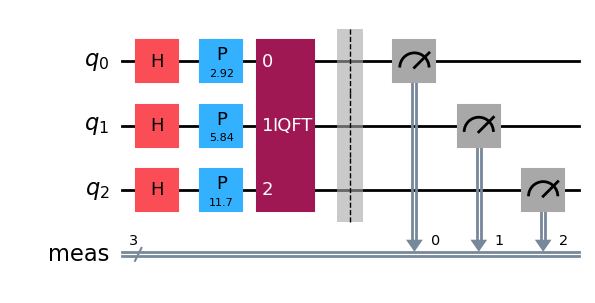


-------------------------------------------------
  Média antes do circuito: 2.99
  Média após o circuito: 3.00
  Diferença percentual: 0.42%

-------------------------------------------------

-------------------------------------------------
  Número de bits: 3
  Média final das medições: 2.99
  Média final IQFT: 3.00
  Desvio padrão das medições: 0.63
  Desvio padrão IQFT: 1.00

-------------------------------------------------


In [17]:
# Comparar o valor da Média com o Período

num_qubits = quantidade_bits(len(medicoes_com_erro))
tolerancia = 0.1
diferenca_percentual = float('inf')  

while diferenca_percentual > tolerancia:

    periodos_resultados = periodo_e_media(num_qubits, medicoes_com_erro)
    
    media_periodos = np.mean(medicoes_com_erro)
    media_periodos_iqft = np.mean(periodos_resultados)

    diferenca_percentual = abs(media_periodos - media_periodos_iqft) / media_periodos
    print("\n-------------------------------------------------")
    print(f"  Média antes do circuito: {media_periodos:.2f}")
    print(f"  Média após o circuito: {media_periodos_iqft:.2f}")
    print(f"  Diferença percentual: {diferenca_percentual:.2%}")
    print("\n-------------------------------------------------")
    
    if diferenca_percentual > tolerancia:
        num_qubits += 1
    else:
        break

desvio_padrao = np.std(medicoes_com_erro)
desvio_padrao_iqft = np.std(periodos_resultados)

print("\n-------------------------------------------------")
print(f"  Número de bits: {num_qubits}")
print(f"  Média final das medições: {media_periodos:.2f}")
print(f"  Média final IQFT: {media_periodos_iqft:.2f}")
print(f"  Desvio padrão das medições: {desvio_padrao:.2f}")
print(f"  Desvio padrão IQFT: {desvio_padrao_iqft:.2f}")
print("\n-------------------------------------------------")
